In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 폰트 적용 (한글 깨짐 방지)
# plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14                 # 폰트 크기
plt.rcParams['figure.figsize'] = (13, 8)       # figsize 를 전역으로 설정
plt.rcParams['axes.unicode_minus'] = False     # -(마이너스) 표기 가능하도록 함

# 데이터 로딩, 변수 초기화

In [3]:
data = pd.read_csv('Global YouTube Statistics2.csv')

# EDA

## 2.콘텐츠 전략

### 1. 가장 인기있는 카테고리는?

In [4]:
category = data['분류'].value_counts().reset_index()
category.columns = ['분류', '채널 수']

columns = ['구독자수', '조회수',
       '최근 30일간 구독자수 증가', '최근 30일간 조회수']
temp = data.groupby('분류')[columns].sum().reset_index()
category = category.merge(temp)

category['분류'] = (category.index + 1).astype(str) + '. ' + category['분류']
category['color'] = list(sns.color_palette("Set2", len(category)))
# category

In [5]:
from matplotlib.gridspec import GridSpec
def make_subplots():
    axes = []
    fig = plt.figure(figsize=(16, 14))
    gs = GridSpec(3, 2, height_ratios=[3, 1, 1])
    axes.append(fig.add_subplot(gs[0, :]))
    axes.append(fig.add_subplot(gs[1, 0]))
    axes.append(fig.add_subplot(gs[1, 1]))
    axes.append(fig.add_subplot(gs[2, 0]))
    axes.append(fig.add_subplot(gs[2, 1]))
    return axes

In [6]:
def barplot(df, x, y, ax, N):
    df = df.sort_values(by=x, ascending=False)[:N].reset_index()
    sns.barplot(df[:N], x=x, y=y, ax=ax, palette=df['color'])
    for i, patch in enumerate(ax.patches):
        ax.text(x = ax.get_xlim()[1] * .01, y = patch.get_y() + 0.5,
                s = df.loc[i, y])
    ax.yaxis.set_visible(False)

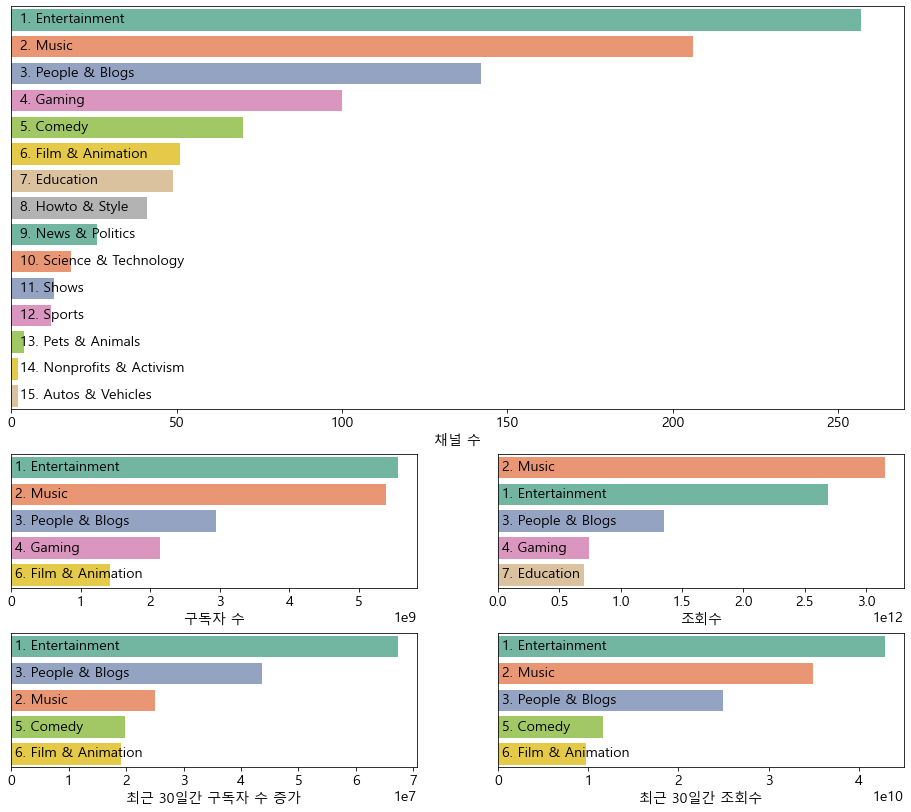

In [7]:
axes = make_subplots()
barplot(category, y='분류', x=category.columns[1], ax=axes[0], N=15)
for idx, col in enumerate(category.columns[2:-1]):
    barplot(category, y='분류', x=col, ax=axes[idx + 1], N=5)
plt.show()

#### 분석
- Entertainment, Music, People & Blogs 가 가장 인기있음
- 지표에 따른 순위는 크지 않은 약간의 변동만 있음
- Music, Education은 조회수에서 상대적으로 더 높음

[이유에 대한 가설]
       평균 재생시간이 짧아서 조회수가 더 높게 나오기 쉽다.
       (Education 채널은 주로 (10세 미만) kids용 채널)
      
- 최근에 Gaming의 인기가 떨어지고 있다


#### 결론
1. YouTube는 재미가 있어야한다. (Entertainment, People & Blogs, Gaming, Film & Animation)

2. YouTube를 통해 음악을 많이 듣는다.

3. YouTube를 통해 사람들의 일상, life, 놀이 등을 보는걸 즐긴다 (People & Blogs)

4. 영화분류의 채널을 직접 들어가서 확인을 해보면,
- 인도에선 무료영화를 Youtube로 많이 보고,
- 나머지 나라에선 (홍보용) Clip영상, (줄거리를 자세히 요약한) 영화소개, kids용 Animation등이 인기를 끈다.


 ### 2. 시청자들에게 반향을 일으키는 '업로드 빈도수' 찾기

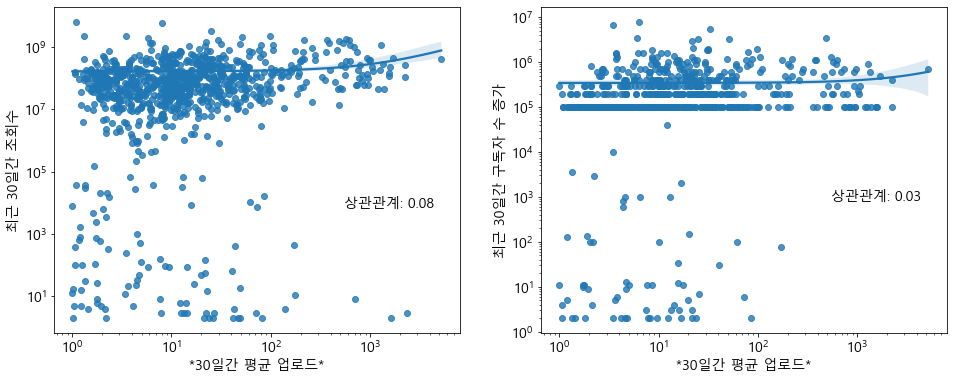

In [8]:
frequency = data[['구독자수', '조회수', '동영상 개수', '*30일간 평균 업로드*',
                  '최근 30일간 조회수', '최근 30일간 구독자 수 증가', '[영상별 평균 조회수]']] + 1
x = '*30일간 평균 업로드*'
# y = '*영상별 평균 조회수*'
y = '최근 30일간 조회수'

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(frequency, x=x, y=y, ax=ax1)
ax1.text(x = (ax1.get_xlim()[1]) * .1, y = ax1.get_ylim()[1]*.000001,
        s = f'상관관계: {data[[x, y]].corr().iloc[0,1].round(2)}')
ax1.loglog()

y = '최근 30일간 구독자수 증가'
sns.regplot(frequency, x=x, y=y, ax=ax2)
ax2.text(x = (ax2.get_xlim()[1]) * .1, y = ax2.get_ylim()[1]*.0001,
        s = f'상관관계: {data[[x, y]].corr().iloc[0,1].round(2)}')
ax2.loglog()
plt.show()

# fig = px.scatter(frequency, x=x, y=y, color='구독자 수')
# # fig.update_xaxes(title_text=x + '(빈도 수) - log scale')
# # fig.update_yaxes(title_text=y + ' - log scale')
# fig.update_layout(xaxis_type='log', yaxis_type='log',)
# fig.show()

#### 분석
- "빈도수" = "30일간 평균 업로드 수"는 대체로 1 ~ 수백 개 정도 이다

결론
- "빈도수"와 "인기" 사이에는 상관 관계가 미미한 수준이다.

   (인기도: '최근 30일간 시청 수', '최근 30일간 구독자 수 증가')

#### 메모리 청소

In [9]:
import gc # garbage collector : 필요없는 메모리를 다시 가져옴.
gc.collect()

3374